In [53]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [46]:
Datos.head(50)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,KMeans_Cluster,DBSCAN_Cluster
0,1,0,19,15,39,0,-1
1,2,0,21,15,81,0,0
2,3,1,20,16,6,0,-1
3,4,1,23,16,77,0,0
4,5,1,31,17,40,0,-1
5,6,1,22,17,76,0,0
6,7,1,35,18,6,0,-1
7,8,1,23,18,94,0,-1
8,9,0,64,19,3,2,-1
9,10,1,30,19,72,0,0


<h1>1.Cargar y explorar el dataset

In [47]:
Datos = pd.read_csv('Mall_Customers.csv')
print(Datos.head())
print(Datos.info())
print(Datos.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

<h1>2.Preprocesamiento de datos 

In [49]:

# Renombrar columnas para mayor comprensión
Datos.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']
print("Columnas renombradas:")
print(Datos.head())


Columnas renombradas:
   CustomerID  Gender  Age  AnnualIncome  SpendingScore
0           1       0   19            15             39
1           2       0   21            15             81
2           3       1   20            16              6
3           4       1   23            16             77
4           5       1   31            17             40


In [50]:

# Manejar valores faltantes
print("Número de valores faltantes antes de eliminar:")
print(Datos.isnull().sum())
Datos.dropna(inplace=True)
print("Número de valores faltantes después de eliminar:")
print(Datos.isnull().sum())


Número de valores faltantes antes de eliminar:
CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64
Número de valores faltantes después de eliminar:
CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


In [51]:
# Transformar datos categóricos (por ejemplo, 'Gender')
Datos['Gender'] = Datos['Gender'].map({'Male': 0, 'Female': 1})
print("Transformación de género:")
print(Datos['Gender'].head())


Transformación de género:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Gender, dtype: float64


In [52]:
# Escalar los datos numéricos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(Datos[['Age', 'AnnualIncome', 'SpendingScore']])
print("Datos escalados:")
print(scaled_features[:5])  # Mostrar los primeros 5 registros escalados

Datos escalados:
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


<h1>3.Seleccion de caracteristicas 

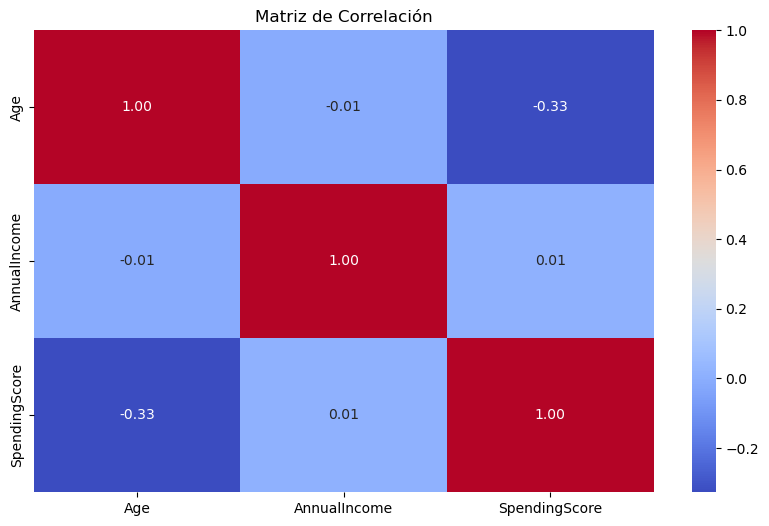

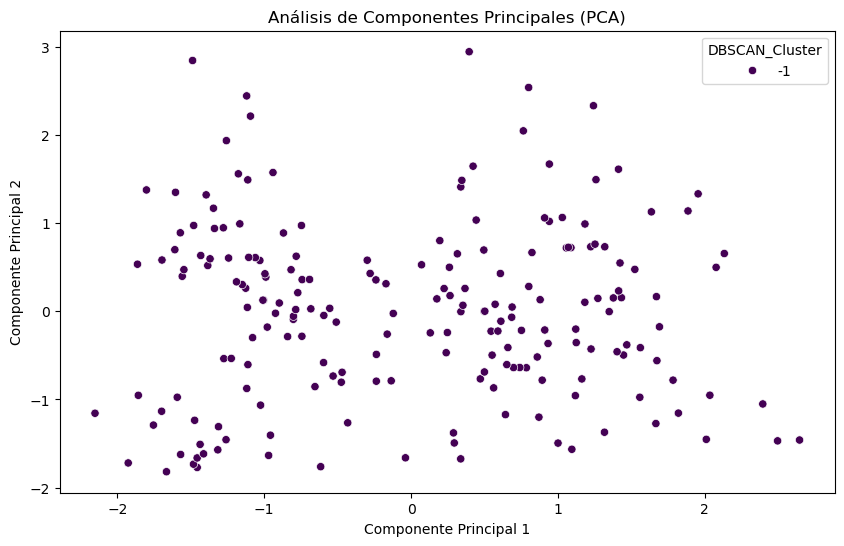

Varianza explicada por cada componente principal:
[0.44266167 0.33308378]


In [60]:
# 3. Selección de características: matriz de correlación
plt.figure(figsize=(10, 6))
correlation_matrix = Datos[['Age', 'AnnualIncome', 'SpendingScore']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

if 'DBSCAN_Cluster' not in Datos.columns:
    # Crear columna ficticia si no existe 
    Datos['DBSCAN_Cluster'] = -1  # Esto es un marcador; 

# Análisis de componentes principales (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Crear un DataFrame para las componentes principales
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

#  }añadir la columna de clusters al DataFrame de componentes principales
if 'DBSCAN_Cluster' in Datos.columns:
    pc_df['DBSCAN_Cluster'] = Datos['DBSCAN_Cluster']
else:
    pc_df['DBSCAN_Cluster'] = -1  # Valor ficticio si no hay clusters

# Visualización de las componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=pc_df, palette='viridis', legend='full')
plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Explicación de la varianza
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(explained_variance)

<h1>4.Modelo de DBSCAN

In [37]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
Datos['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)


<h1>5.Evaluacion del modelo DBSCAN

In [39]:
# Filtrar outliers (DBSCAN asigna -1 a los outliers)
cluster_labels = Datos['DBSCAN_Cluster'][Datos['DBSCAN_Cluster'] != -1]
silhouette_avg = silhouette_score(scaled_features[Datos['DBSCAN_Cluster'] != -1], cluster_labels)
calinski_harabasz = calinski_harabasz_score(scaled_features[Datos['DBSCAN_Cluster'] != -1], cluster_labels)

print(f'Silhouette Score for DBSCAN: {silhouette_avg}')
print(f'Calinski-Harabasz Index for DBSCAN: {calinski_harabasz}')

Silhouette Score for DBSCAN: 0.481714917862304
Calinski-Harabasz Index for DBSCAN: 117.80491316421794


<h1>6. Visualización de los resultados de DBSCAN

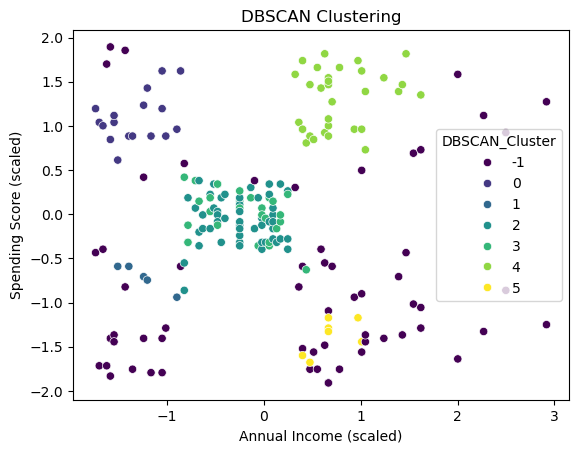

In [40]:
sns.scatterplot(x=scaled_features[:, 1], y=scaled_features[:, 2], hue=Datos['DBSCAN_Cluster'], palette='viridis', legend='full')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()


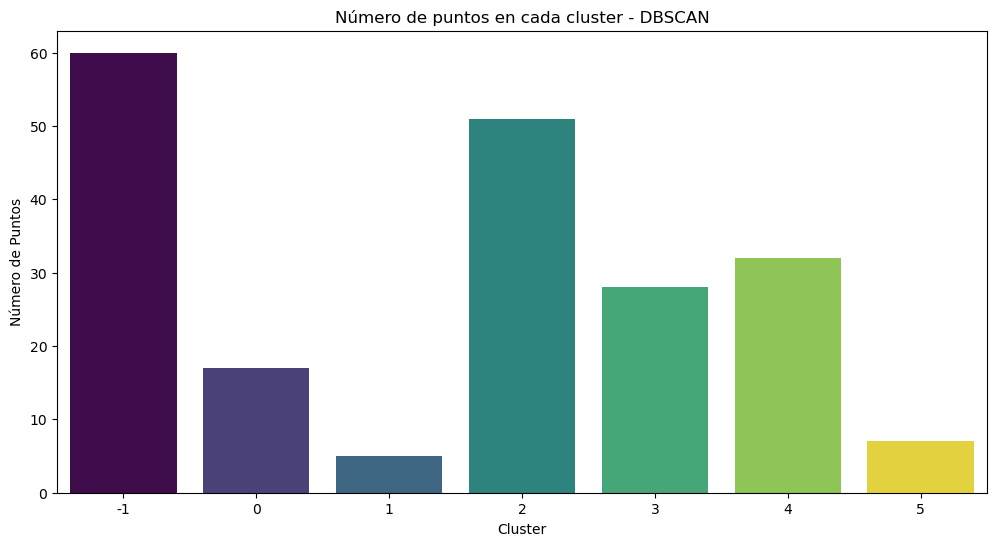

In [42]:
cluster_summary = Datos.groupby('DBSCAN_Cluster').size().reset_index(name='Number of Points')
cluster_summary.sort_values(by='Number of Points', ascending=False, inplace=True)

# Mostrar el resumen en forma de gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='DBSCAN_Cluster', y='Number of Points', data=cluster_summary, palette='viridis', hue='DBSCAN_Cluster', dodge=False)
plt.title('Número de puntos en cada cluster - DBSCAN')
plt.xlabel('Cluster')
plt.ylabel('Número de Puntos')
plt.legend([], [], frameon=False)  # Desactivar la leyenda si no es necesaria
plt.show()

<h1>7.Interpretacion de resultados 


1. Análisis Exploratorio: Se realizó un análisis exploratorio inicial que permitió conocer las características básicas del conjunto de datos, identificando variables como edad, ingreso anual y puntaje de gasto. Esto ayudó a comprender la estructura de los datos y a detectar valores atípicos.

2. Preprocesamiento de Datos: Se renombraron las columnas para mayor claridad, se eliminaron los valores faltantes y se transformaron las variables categóricas en numéricas. Esto garantizó que los datos estuvieran limpios y listos para el análisis.

3. Selección de Características: Se utilizó la matriz de correlación para identificar relaciones entre las variables, lo que permitió seleccionar las más relevantes para el clustering. Esto es fundamental para mejorar la precisión de los modelos y evitar la redundancia de información.

4. Modelos de Clustering:

Clustering Jerárquico (DBSCAN): Se aplicó DBSCAN, que permite identificar clusters de forma más flexible, especialmente en presencia de ruido. También se evaluó con métricas similares.

5. Visualización de Resultados: Se generaron gráficos, incluyendo matrices de correlación, scatter plots para PCA y gráficos de barras para visualizar la distribución de puntos en cada cluster. Esto ayudó a interpretar los resultados de forma más intuitiva.

6. Análisis de Componentes Principales (PCA): Se aplicó PCA para reducir la dimensionalidad de los datos y facilitar la visualización, capturando la mayor parte de la variabilidad en un espacio reducido. Esto es útil para identificar patrones subyacentes en los datos.